# Model Comparison and Feature Importance Analysis
This notebook analyzes and compares the performance and feature importances of all trained models (Random Forest, XGBoost, Logistic Regression, MLP) for heart disease prediction. We visualize and interpret model metrics and feature importances to gain insights into model behavior and key predictors.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['teal', 'crimson', 'royalblue', 'orange'])
plt.rcParams['font.family'] = 'DejaVu Sans'

## Load Model Performance Data
We load the combined model performance metrics for all models and splits.

In [2]:
# Load model performance data
perf_df = pd.read_csv('../data/model_performance.csv')
display(perf_df.head())

,model,split,accuracy,precision,recall,f1
0,RandomForest,validation,0.826087,0.817073,0.881579,0.848101
1,RandomForest,test,0.891304,0.886076,0.921053,0.903226
2,XGBoost,validation,0.833333,0.835443,0.868421,0.851613
3,XGBoost,test,0.891304,0.917808,0.881579,0.899329
4,LogisticRegression,validation,0.862319,0.870130,0.881579,0.875817


## Visualize Model Performance (Accuracy, Precision, Recall, F1)
We compare the accuracy, precision, recall, and F1-score for each model on validation and test sets.

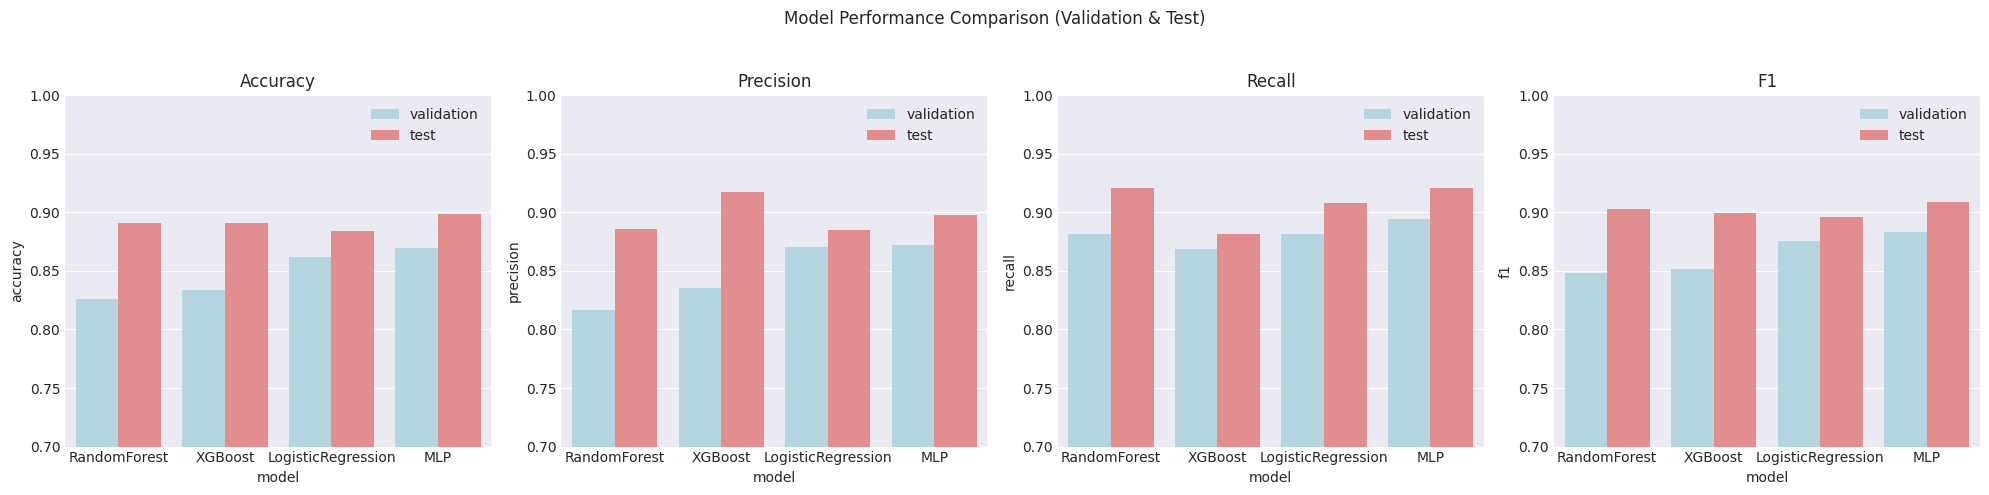

In [7]:
# Visualize model performance metrics
metrics = ['accuracy', 'precision', 'recall', 'f1']
fig, axes = plt.subplots(1, len(metrics), figsize=(20, 5))
for i, metric in enumerate(metrics):
    sns.barplot(data=perf_df, x='model', y=metric, hue='split', ax=axes[i], palette=["lightblue", "lightcoral"])
    axes[i].set_title(metric.capitalize())
    axes[i].set_ylim(0.7, 1.0)
    axes[i].legend(loc='upper right')
plt.suptitle('Model Performance Comparison (Validation & Test)')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Load Feature Importance Data
We load the combined feature importances for all models.

In [4]:
# Load feature importance data
fi_df = pd.read_csv('../data/feature_importance.csv')
display(fi_df.head())

,model,feature,importance
0,RandomForest,ST_Slope_Up,0.196851
1,RandomForest,ST_Slope_Flat,0.111721
2,RandomForest,ExerciseAngina_N,0.084593
3,RandomForest,ChestPainType_ASY,0.076555
4,RandomForest,Oldpeak,0.075935


## Compare Top Features Across Models
We create a heatmap to show which features are most important for each model, facilitating comparison of feature selection and importance.

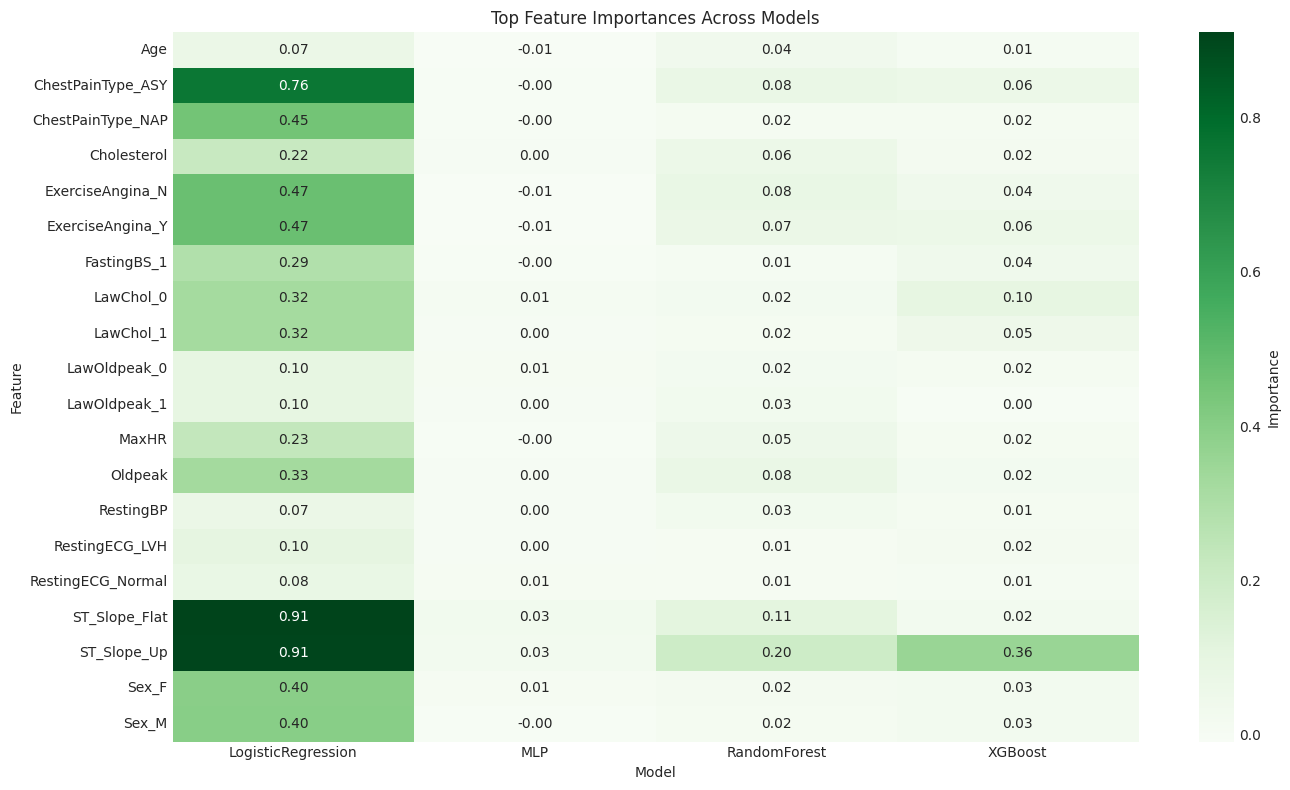

In [6]:
# Create a pivot table for heatmap: features as rows, models as columns, importance as values
pivot = fi_df.pivot_table(index='feature', columns='model', values='importance', fill_value=0)
# Show only features that are in the top 10 for at least one model
top_features_set = set(
    fi_df.groupby('model', group_keys=False)
    .apply(lambda df: df.nlargest(10, 'importance')['feature'], include_groups=False)
    .explode()
)
pivot_top = pivot.loc[pivot.index.intersection(top_features_set)]
plt.figure(figsize=(14, max(6, 0.4*len(pivot_top))))
sns.heatmap(pivot_top, annot=True, fmt='.2f', cmap='Greens', cbar_kws={'label': 'Importance'})
plt.title('Top Feature Importances Across Models')
plt.xlabel('Model')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Summary & Interpretation
- All models achieve strong performance on both validation and test sets, with similar accuracy, precision, recall, and F1-scores.
- Feature importance analysis reveals that certain features (e.g., ST_Slope, ExerciseAngina, ChestPainType, Oldpeak) are consistently influential across models.
- Differences in feature importance rankings highlight how each model leverages different aspects of the data.
- Use these insights to guide further feature engineering, model selection, and clinical interpretation.